In [1]:
from qiskit import IBMQ

# Load Account and Choose Backend
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
name = 'ibmqx2'
backend = provider.get_backend(name) # ibmq_16_melbourne, ibmq_vigo, ibmq_london, ibmq_burlington, ibmq_essex, ibmqx2, ibmq_ourense

In [2]:
import warnings
import sys
sys.path.insert(1, '../Scripts')
from expfuncs import *
warnings.filterwarnings('ignore')

interested_qubits = [4,3,2,1]
itr = 32
QDT_correlated = False
noise_file_address = 'Noise4Q/'
file_address = 'T14Q/'
all_methods_data(interested_qubits,backend, itr, QDT_correlated, file_address = noise_file_address)

Our method
Job Status: job has successfully run
Qiskit Method
Job Status: job has successfully run
QDT, correlation =  False
Number of Circuits needed is  6
Job Status: job has successfully run
Number of Circuits needed is  6
Job Status: job has successfully run
Number of Circuits needed is  6
Job Status: job has successfully run
Number of Circuits needed is  6
Job Status: job has successfully run
Write data for standard Bayesian


16


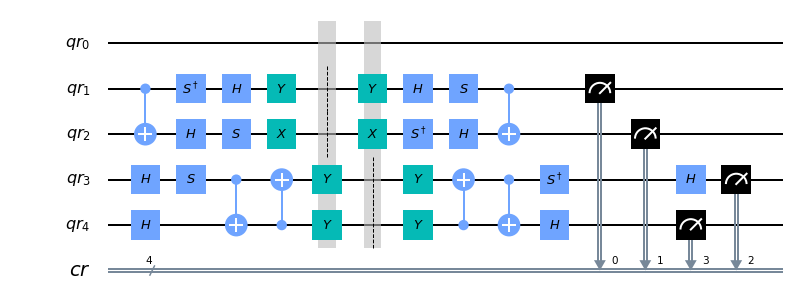

In [3]:
#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

#Generate RB circuits (2Q RB)
#number of qubits
#nQ=2
rb_opts = {}
#Number of Cliffords in the sequence
rb_opts['length_vector'] = [1,2,3,4]
#Number of seeds (random sequences)
rb_opts['nseeds'] = 16
#Default pattern
rb_opts['rb_pattern'] = [[1,2],[3,4]]

with open(file_address + 'RBparams.csv', newline='',mode='w') as sgr:
    count_writer = csv.writer(sgr, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    count_writer.writerow(['nseeds', rb_opts['nseeds']])
    arr = np.array(['length_vector'])
    count_writer.writerow(np.append(arr, rb_opts['length_vector']))

rb_circs, xdata = rb.randomized_benchmarking_seq(**rb_opts)
print(len(rb_circs))
rb_circs[0][0].draw(output='mpl')

In [4]:
circs = []
name_prefix = []
name_suffix = []
for i in range(rb_opts['nseeds']):
    n2 = 'seed'+str(i)
    name_suffix.append(n2)
for j in range(len(rb_opts['length_vector'])):
    n1 = 'len'+str(rb_opts['length_vector'][j])
    name_prefix.append(n1)
    
for n1 in name_prefix:
    for n2 in name_suffix:
        circs.append(rb_circs[i][j].copy(n1+n2))

In [5]:
from qiskit import Aer,QuantumCircuit,transpile,execute,QuantumRegister
from qiskit.tools.monitor import job_monitor

# backend = Aer.get_backend("qasm_simulator")
shots = 8192
job = execute(circs, backend, shots=shots)
job_monitor(job)
res = job.result()
for length in name_prefix:
    print(length)
    for seed in name_suffix:
        print(seed)
        circ_name = length+seed
        with open(file_address + circ_name + '.csv',newline='', mode='w') as sgr:
            count_writer = csv.writer(sgr, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            for key, val in res.get_counts(circ_name).items():
                count_writer.writerow([key,val])

Job Status: job has successfully run
len1
seed0
seed1
seed2
seed3
seed4
seed5
seed6
seed7
seed8
seed9
seed10
seed11
seed12
seed13
seed14
seed15
len2
seed0
seed1
seed2
seed3
seed4
seed5
seed6
seed7
seed8
seed9
seed10
seed11
seed12
seed13
seed14
seed15
len3
seed0
seed1
seed2
seed3
seed4
seed5
seed6
seed7
seed8
seed9
seed10
seed11
seed12
seed13
seed14
seed15
len4
seed0
seed1
seed2
seed3
seed4
seed5
seed6
seed7
seed8
seed9
seed10
seed11
seed12
seed13
seed14
seed15


Standard Bayesian filter
Our Filter
Qubit 4
Given Lambdas [0.959 0.952]
Final Accepted Posterior Lambdas
M: 14.836 Index: 39923 pi_obs = 22.1016 pi_Q(prior) = 1.48972
Accepted Number N: 2691, 0.067
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.79910485 0.95596652]
Posterior Lambda Mode [0.80473532 0.98561449]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.00147404
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf
0 to 1: KL-Div(qiskit,pi_D^obs) =    inf
0 to 1: KL-Div(pi_D^obs,qiskit) = 0.218361
Post and Data: Sum of Differences  0.032708880684682966
Qisk and Data: Sum of Differences  0.5367528172497392


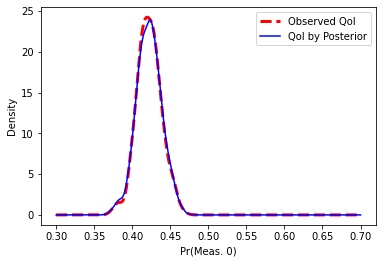

Qubit 3
Given Lambdas [0.994 0.985]
Final Accepted Posterior Lambdas
M: 2.29804 Index: 11974 pi_obs = 23.1532 pi_Q(prior) = 10.0752
Accepted Number N: 17579, 0.439
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.92837311 0.93314451]
Posterior Lambda Mode [0.95037841 0.95965707]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.000370914
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf
0 to 1: KL-Div(qiskit,pi_D^obs) =    inf
0 to 1: KL-Div(pi_D^obs,qiskit) = 0.0348729
Post and Data: Sum of Differences  0.017918640085436498
Qisk and Data: Sum of Differences  0.2087614903415319


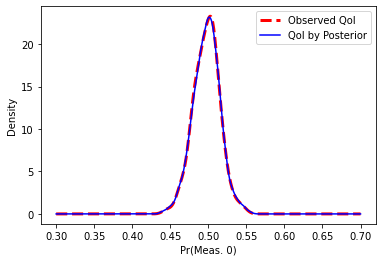

Qubit 2
Given Lambdas [0.984 0.974]
Final Accepted Posterior Lambdas
M: 2.65165 Index: 35244 pi_obs = 24.0828 pi_Q(prior) = 9.08218
Accepted Number N: 15266, 0.382
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.93189913 0.92108646]
Posterior Lambda Mode [0.9553232  0.94337476]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.000521497
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf
0 to 1: KL-Div(qiskit,pi_D^obs) =    inf
0 to 1: KL-Div(pi_D^obs,qiskit) = 0.0410894
Post and Data: Sum of Differences  0.023302158970127516
Qisk and Data: Sum of Differences  0.23212371764592907


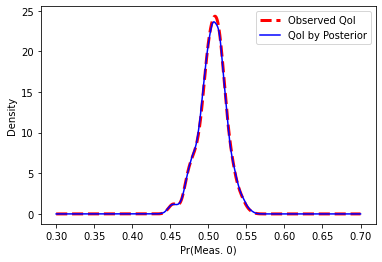

Qubit 1
Given Lambdas [0.987 0.984]
Final Accepted Posterior Lambdas
M: 2.79087 Index: 27889 pi_obs = 22.6449 pi_Q(prior) = 8.11391
Accepted Number N: 14538, 0.363
I(pi^post_Lambda) = 1
Posterior Lambda Mean [0.94106687 0.91170853]
Posterior Lambda Mode [0.98367289 0.92444059]
0 to 1: KL-Div(pi_D^Q(post),pi_D^obs) = 0.000785987
0 to 1: KL-Div(pi_D^obs,pi_D^Q(post)) =    inf
0 to 1: KL-Div(qiskit,pi_D^obs) =    inf
0 to 1: KL-Div(pi_D^obs,qiskit) = 0.00315288
Post and Data: Sum of Differences  0.026101013424387608
Qisk and Data: Sum of Differences  0.06016789318352476


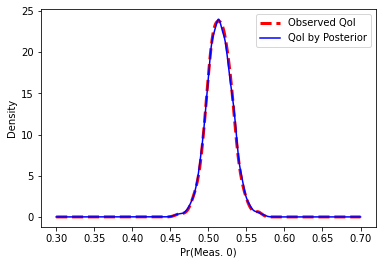

Qiskit filter
QDT filter


In [7]:
# Create Filters
# Run R file first!
our_filter, qiskit_filter, QDT_filter, SB_filter = create_filters(interested_qubits,QDT_correlated, show_denoised = False, file_address = noise_file_address)

In [8]:
# Read RB paramsters
with open(file_address + 'RBparams.csv', mode='r') as sgm:
    reader = csv.reader(sgm)
    rb_params = {}
    for row in reader:
        if row[0] == 'nseeds':
            rb_params[row[0]] = int(row[1])
        if row[0] == 'length_vector':
            rb_params[row[0]] = []
            for i in range(1,len(row)):
                rb_params[row[0]].append(int(row[i]))
rb_params

{'nseeds': 16, 'length_vector': [1, 2, 3, 4]}

In [9]:
#Read RB data
import pandas as pd
df = pd.DataFrame({'Length':[], 'Seed':[], 'Probability':[], 'Method':[]})
for length in rb_params['length_vector']:
    for seed in range(rb_params['nseeds']):
        circ_name = 'len{}seed{}'.format(length,seed)
        with open(file_address + circ_name + '.csv', mode='r') as sgm:
            reader = csv.reader(sgm)
            real_counts = {}
            for row in reader:
                if (len(row)> 0):
                    real_counts[row[0]] = int(row[1])
        #print(real_counts)
        mean_counts = our_filter.filter_mean(real_counts)
        mode_counts = our_filter.filter_mode(real_counts)
        qis_counts = qiskit_filter.apply(real_counts)
        QDT_counts = QDT_filter.filter(real_counts)
        sbmean_counts = SB_filter.filter_mean(real_counts)
        sbmode_counts = SB_filter.filter_mode(real_counts)
        df = df.append({'Length': length, 'Seed': seed, 'Probability': real_counts['0000']/8192, 'Method': 'Real'}, ignore_index=True)
        df = df.append({'Length': length, 'Seed': seed, 'Probability': mean_counts['0000']/8192, 'Method': 'BJW Mean'}, ignore_index=True)
        df = df.append({'Length': length, 'Seed': seed, 'Probability': mode_counts['0000']/8192, 'Method': 'BJW MAP'}, ignore_index=True)
        df = df.append({'Length': length, 'Seed': seed, 'Probability': sbmean_counts['0000']/8192, 'Method': 'SB Mean'}, ignore_index=True)
        df = df.append({'Length': length, 'Seed': seed, 'Probability': sbmode_counts['0000']/8192, 'Method': 'SB MAP'}, ignore_index=True)
        df = df.append({'Length': length, 'Seed': seed, 'Probability': qis_counts['0000']/8192, 'Method': 'Qiskit'}, ignore_index=True)
        df = df.append({'Length': length, 'Seed': seed, 'Probability': QDT_counts['0000']/8192, 'Method': 'QDT'}, ignore_index=True)
#df

Length 1


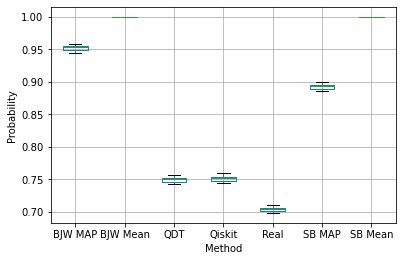

Length 2


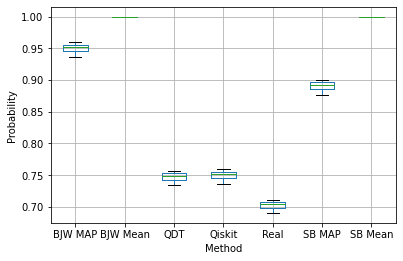

Length 3


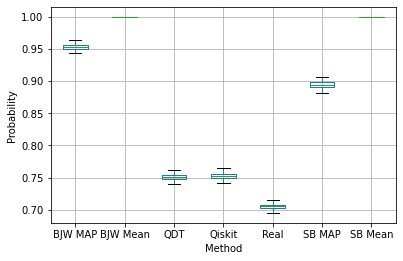

Length 4


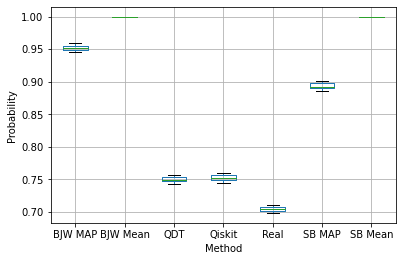

In [10]:
for length in rb_params['length_vector']:
    print('Length {}'.format(length))
    sub_df = df.loc[df['Length'] == length]
    ax = sub_df.drop(['Seed'], axis = 1).boxplot(column = 'Probability', by = 'Method')
    ax.set_xlabel('Method')
    ax.set_ylabel('Probability')
    ax.set_title('')
    plt.suptitle('')
    plt.savefig(file_address + 'boxplot-len{}.jpg'.format(length))
    plt.show()

In [12]:
df

,Length,Seed,Probability,Method
0,1.0,0.0,0.705078,Real
1,1.0,0.0,0.999878,BJW Mean
2,1.0,0.0,0.953491,BJW MAP
3,1.0,0.0,0.999878,SB Mean
4,1.0,0.0,0.894409,SB MAP
...,...,...,...,...
443,4.0,15.0,0.959961,BJW MAP
444,4.0,15.0,0.999878,SB Mean
445,4.0,15.0,0.900513,SB MAP
446,4.0,15.0,0.759152,Qiskit
